Voting Classifier, Bagging & Pasting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_wine
wine = load_wine()

In [3]:
print(wine['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [4]:
data_wine = pd.DataFrame(data=wine['data'], columns=wine['feature_names'])

In [5]:
data_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [6]:
data_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [7]:
data_wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [8]:
target = pd.DataFrame(wine['target'], columns = ['Target'])
target[target['Target']==0] = "Class 0"
target[target['Target']==1] = "Class 1"
target[target['Target']==2] = "Class 2"

In [9]:
data_wine = pd.concat([data_wine,target],axis=1)

<Figure size 8064x720 with 0 Axes>

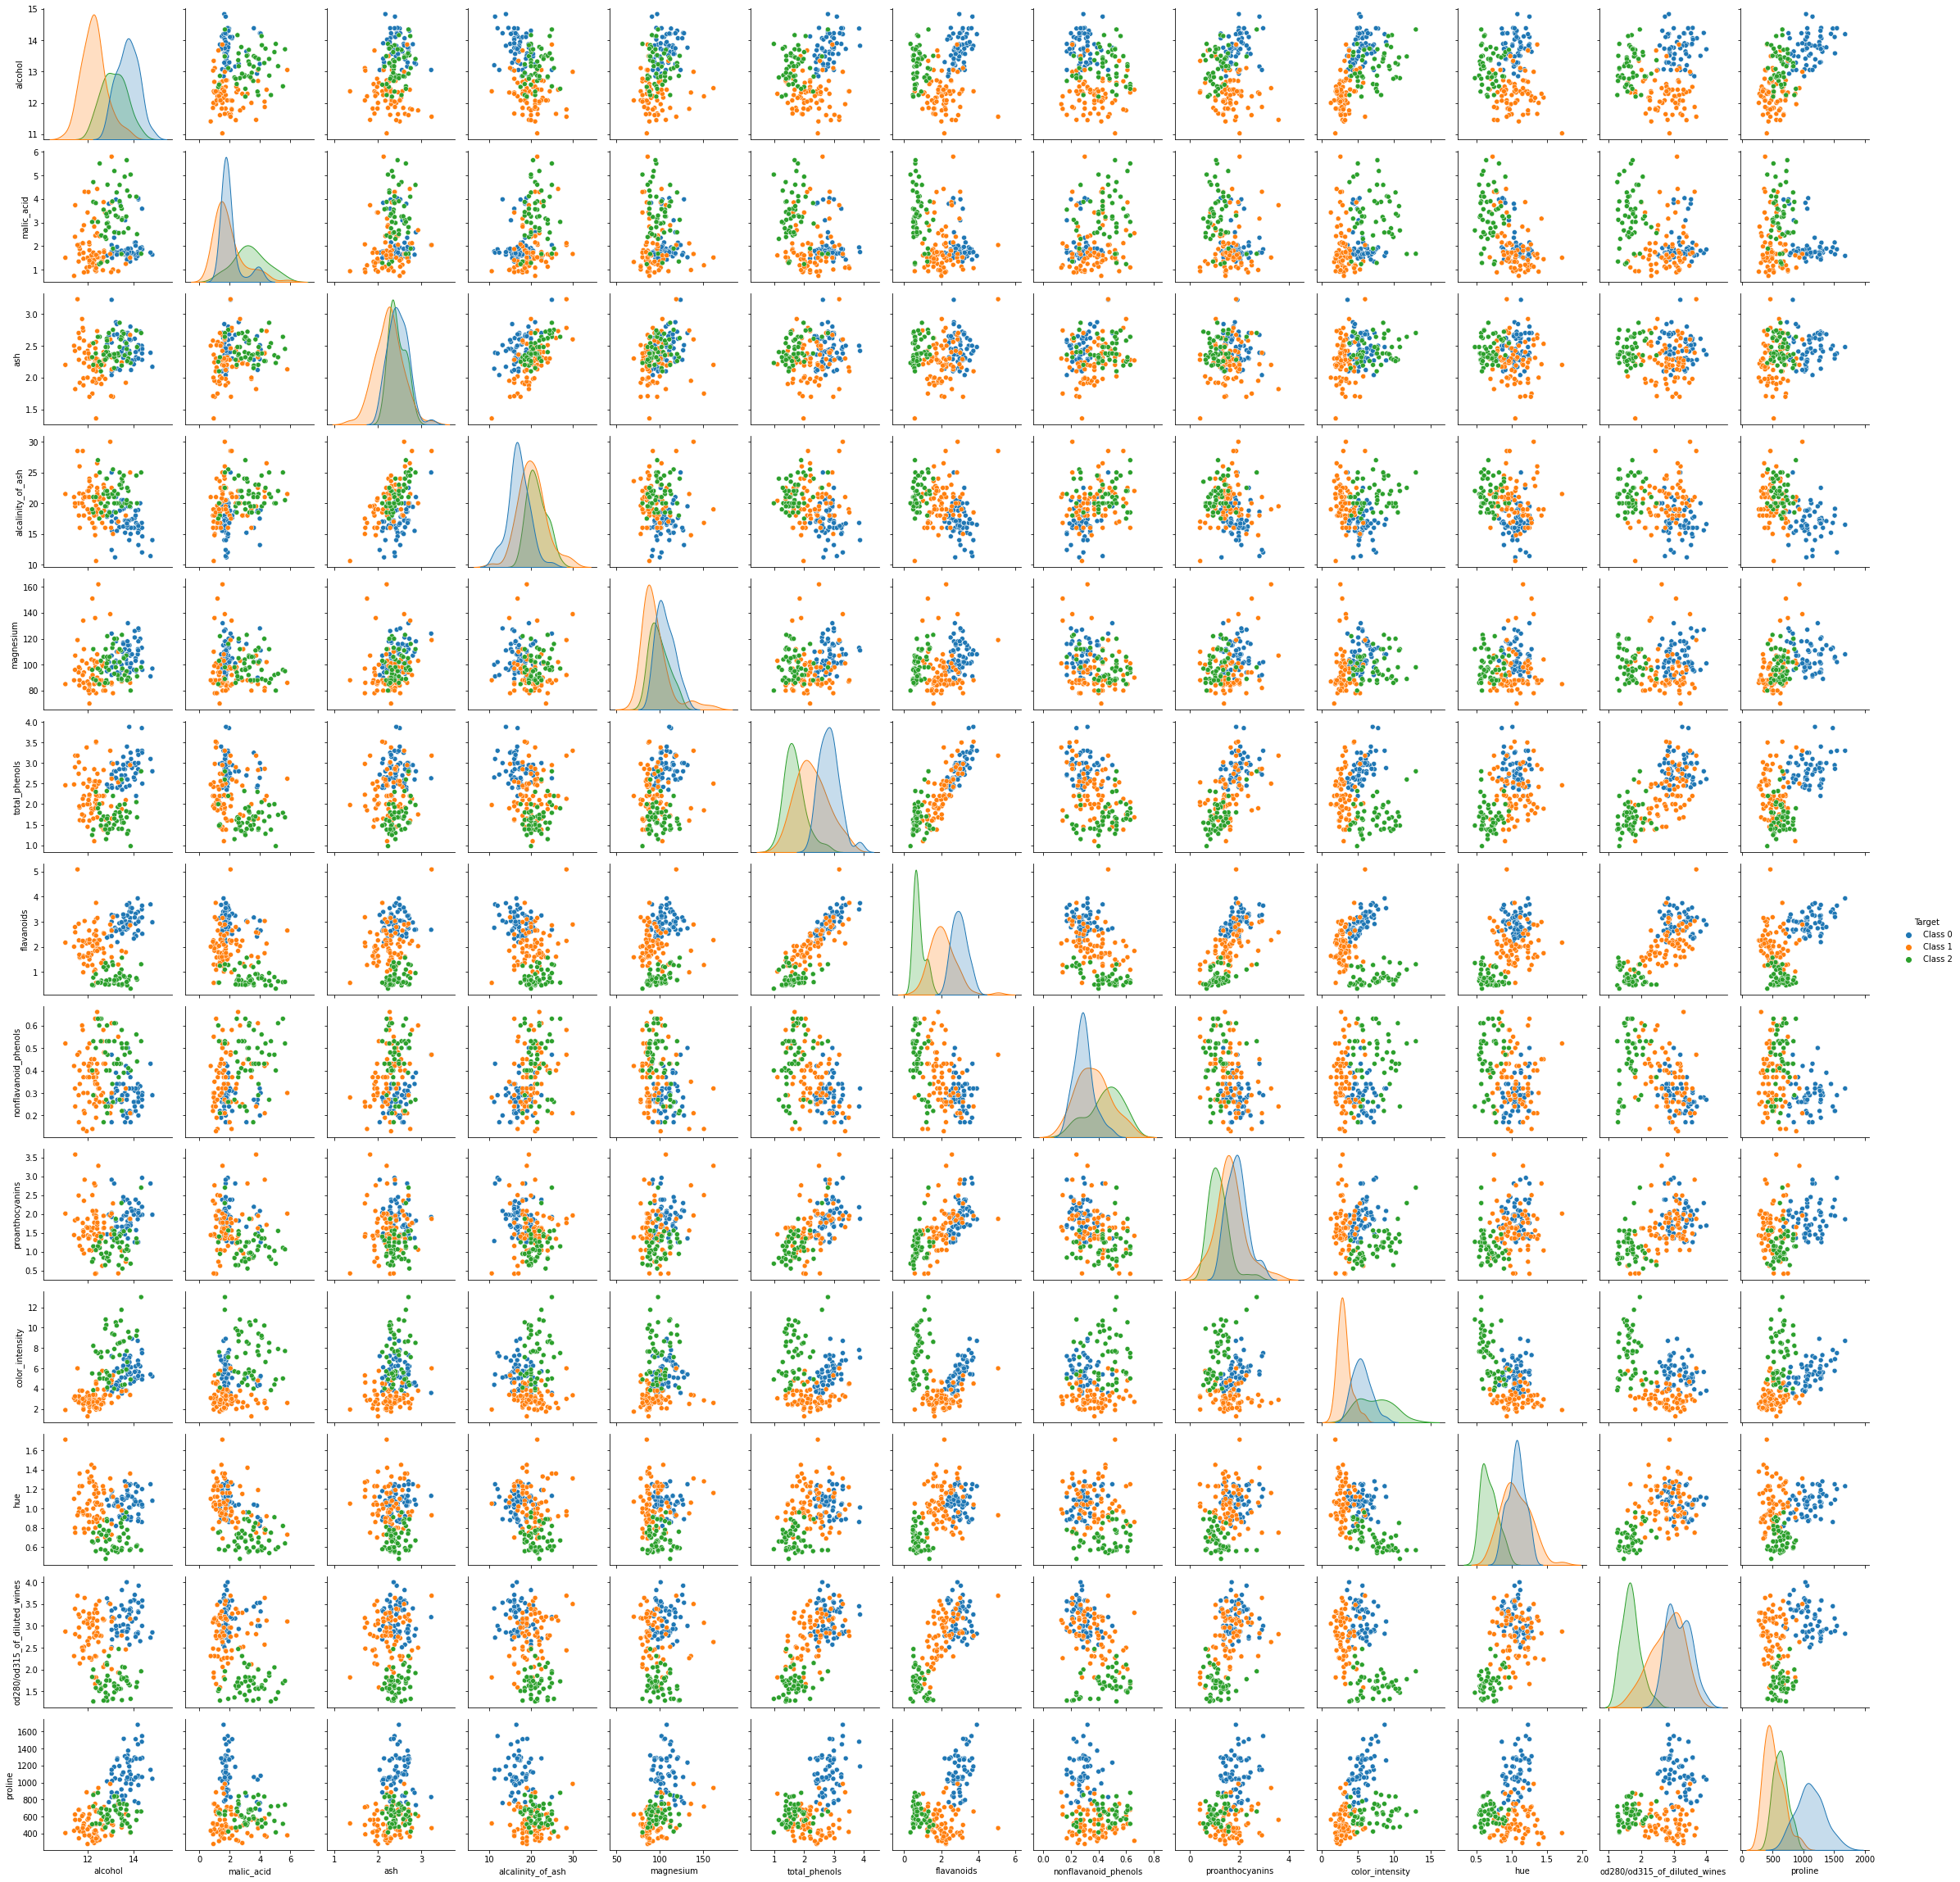

In [10]:
plt.figure(figsize=(112,10))
sns.pairplot(data_wine,hue='Target')

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

In [12]:
data_wine = shuffle(data_wine, random_state=15)

In [13]:
ss = StandardScaler()

In [14]:
X = data_wine.iloc[:,:-1]
y = data_wine.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.28, random_state=86)

In [15]:
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

-----------------------------------------------------------------------

Voting Classifier

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.ensemble import VotingClassifier

In [17]:
logr = LogisticRegression()
sgd1 = SGDClassifier(loss='hinge')
sgd2 = SGDClassifier(loss='log')
knn = KNeighborsClassifier()
dtree = DecisionTreeClassifier()
svc = SVC(probability=True)

In [18]:
soft_voting = VotingClassifier(estimators=[('logr', logr), ('sgd', sgd2), ('knn', knn),('dtree', dtree),('svc', svc)],
                              voting='soft')
hard_voting = VotingClassifier(estimators=[('logr', logr), ('sgd', sgd1), ('knn', knn),('dtree', dtree),('svc', svc)],
                              voting='hard')

In [19]:
soft_voting.fit(X_train,y_train)

VotingClassifier(estimators=[('logr', LogisticRegression()),
                             ('sgd', SGDClassifier(loss='log')),
                             ('knn', KNeighborsClassifier()),
                             ('dtree', DecisionTreeClassifier()),
                             ('svc', SVC(probability=True))],
                 voting='soft')

In [20]:
hard_voting.fit(X_train, y_train)

VotingClassifier(estimators=[('logr', LogisticRegression()),
                             ('sgd', SGDClassifier()),
                             ('knn', KNeighborsClassifier()),
                             ('dtree', DecisionTreeClassifier()),
                             ('svc', SVC(probability=True))])

In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [22]:
pred1 = soft_voting.predict(X_test)

In [23]:
print(accuracy_score(y_test, pred1))
print(confusion_matrix(y_test, pred1))
print(classification_report(y_test, pred1))

0.98
[[22  0  0]
 [ 0 15  0]
 [ 0  1 12]]
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        22
     Class 1       0.94      1.00      0.97        15
     Class 2       1.00      0.92      0.96        13

    accuracy                           0.98        50
   macro avg       0.98      0.97      0.98        50
weighted avg       0.98      0.98      0.98        50



In [24]:
pred2 = hard_voting.predict(X_test)

In [25]:
print(accuracy_score(y_test, pred2))
print(confusion_matrix(y_test, pred2))
print(classification_report(y_test, pred2))

1.0
[[22  0  0]
 [ 0 15  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        22
     Class 1       1.00      1.00      1.00        15
     Class 2       1.00      1.00      1.00        13

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



----------------------------------------------------------------------------

Bagging and Pasting

In [26]:
from sklearn.ensemble import BaggingClassifier

In [27]:
bag_clf = BaggingClassifier(dtree, n_estimators= 1000, bootstrap=True)
paste_clf = BaggingClassifier(dtree, n_estimators= 1000, bootstrap=False)

In [28]:
bag_clf.fit(X_train, y_train)
paste_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap=False,
                  n_estimators=1000)

In [29]:
pred3 = bag_clf.predict(X_test)
pred4 = paste_clf.predict(X_test)

In [30]:
print(accuracy_score(y_test, pred3))
print(confusion_matrix(y_test, pred3))
print(classification_report(y_test, pred3))

0.96
[[20  2  0]
 [ 0 15  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

     Class 0       1.00      0.91      0.95        22
     Class 1       0.88      1.00      0.94        15
     Class 2       1.00      1.00      1.00        13

    accuracy                           0.96        50
   macro avg       0.96      0.97      0.96        50
weighted avg       0.96      0.96      0.96        50



In [31]:
print(accuracy_score(y_test, pred4))
print(confusion_matrix(y_test, pred4))
print(classification_report(y_test, pred4))

0.94
[[19  3  0]
 [ 0 15  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

     Class 0       1.00      0.86      0.93        22
     Class 1       0.83      1.00      0.91        15
     Class 2       1.00      1.00      1.00        13

    accuracy                           0.94        50
   macro avg       0.94      0.95      0.95        50
weighted avg       0.95      0.94      0.94        50



---------------------------------------------------------------------------

AdaBoost

In [32]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

In [33]:
ada_clf = AdaBoostClassifier(dtree, algorithm='SAMME')

In [34]:
grid_params = [{
    'n_estimators': range(1000,20000,500),
    'learning_rate': np.arange(0.1,2,0.2)
}]

In [35]:
gs_ada = GridSearchCV(ada_clf, grid_params, verbose = 1, cv = 30, n_jobs = -1, scoring = 'accuracy')

In [36]:
gs_ada.fit(X_train,y_train.ravel())

Fitting 30 folds for each of 380 candidates, totalling 11400 fits


GridSearchCV(cv=30,
             estimator=AdaBoostClassifier(algorithm='SAMME',
                                          base_estimator=DecisionTreeClassifier()),
             n_jobs=-1,
             param_grid=[{'learning_rate': array([0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9]),
                          'n_estimators': range(1000, 20000, 500)}],
             scoring='accuracy', verbose=1)

In [37]:
gs_ada.best_params_

{'learning_rate': 0.1, 'n_estimators': 1500}

In [38]:
gs_ada.best_score_

0.9466666666666667

In [39]:
pred5 = gs_ada.best_estimator_.predict(X_test)

In [40]:
print(accuracy_score(y_test, pred5))
print(confusion_matrix(y_test, pred5))
print(classification_report(y_test, pred5))

0.9
[[19  3  0]
 [ 1 14  0]
 [ 0  1 12]]
              precision    recall  f1-score   support

     Class 0       0.95      0.86      0.90        22
     Class 1       0.78      0.93      0.85        15
     Class 2       1.00      0.92      0.96        13

    accuracy                           0.90        50
   macro avg       0.91      0.91      0.90        50
weighted avg       0.91      0.90      0.90        50



In [41]:
ada2_clf = AdaBoostClassifier(sgd2, algorithm='SAMME')
grid_params = [{
    'n_estimators': range(1000,20000,500),
    'learning_rate': np.arange(0.1,2,0.2)
}]
gs_ada2 = GridSearchCV(ada2_clf, grid_params, verbose = 1, cv = 30, n_jobs = -1, scoring = 'accuracy')

In [42]:
gs_ada2.fit(X_train,y_train.ravel())

Fitting 30 folds for each of 380 candidates, totalling 11400 fits


GridSearchCV(cv=30,
             estimator=AdaBoostClassifier(algorithm='SAMME',
                                          base_estimator=SGDClassifier(loss='log')),
             n_jobs=-1,
             param_grid=[{'learning_rate': array([0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9]),
                          'n_estimators': range(1000, 20000, 500)}],
             scoring='accuracy', verbose=1)

In [43]:
gs_ada.best_params_

{'learning_rate': 0.1, 'n_estimators': 1500}

In [44]:
gs_ada.best_score_

0.9466666666666667

In [45]:
pred6 = gs_ada2.best_estimator_.predict(X_test)

In [46]:
print(accuracy_score(y_test, pred6))
print(confusion_matrix(y_test, pred6))
print(classification_report(y_test, pred6))

0.98
[[22  0  0]
 [ 0 15  0]
 [ 0  1 12]]
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        22
     Class 1       0.94      1.00      0.97        15
     Class 2       1.00      0.92      0.96        13

    accuracy                           0.98        50
   macro avg       0.98      0.97      0.98        50
weighted avg       0.98      0.98      0.98        50



-----------------------------------------------------------------------------------------------

Gradient Boosting

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

In [48]:
gradboost = GradientBoostingClassifier(n_estimators=1500, learning_rate=0.7, verbose=1)

In [49]:
gradboost.fit(X_train,y_train)

      Iter       Train Loss   Remaining Time 
         1           0.2206           19.31s
         2           0.0833           13.56s
         3           0.0344           11.33s
         4           0.0151           10.27s
         5           0.0062            9.62s
         6           0.0026            9.16s
         7           0.0011            8.83s
         8           0.0005            8.53s
         9           0.0002            8.53s
        10           0.0001            8.45s
        20           0.0000            6.95s
        30           0.0000            5.98s
        40           0.0000            5.21s
        50           0.0000            4.95s
        60           0.0000            4.61s
        70           0.0000            4.48s
        80           0.0000            4.43s
        90           0.0000            4.25s
       100           0.0000            4.06s
       200           0.0000            3.19s
       300           0.0000            2.66s
       40

GradientBoostingClassifier(learning_rate=0.7, n_estimators=1500, verbose=1)

In [50]:
pred7 = gradboost.predict(X_test)

In [51]:
print(accuracy_score(y_test, pred7))
print(confusion_matrix(y_test, pred7))
print(classification_report(y_test, pred7))

0.98
[[22  0  0]
 [ 1 14  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

     Class 0       0.96      1.00      0.98        22
     Class 1       1.00      0.93      0.97        15
     Class 2       1.00      1.00      1.00        13

    accuracy                           0.98        50
   macro avg       0.99      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



------------------------------------------------------------------------------------------

Blending

In [52]:
from sklearn.ensemble import StackingClassifier

In [53]:
blending = StackingClassifier(estimators=[('logr', logr), ('sgd', sgd1), ('knn', knn),('dtree', dtree),('svc', svc)], 
                              final_estimator = LogisticRegression(solver='newton-cg'), cv = 30, verbose=1, passthrough=True)

In [54]:
blending.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished


StackingClassifier(cv=30,
                   estimators=[('logr', LogisticRegression()),
                               ('sgd', SGDClassifier()),
                               ('knn', KNeighborsClassifier()),
                               ('dtree', DecisionTreeClassifier()),
                               ('svc', SVC(probability=True))],
                   final_estimator=LogisticRegression(solver='newton-cg'),
                   passthrough=True, verbose=1)

In [55]:
pred8 = blending.predict(X_test)

In [56]:
print(accuracy_score(y_test, pred8))
print(confusion_matrix(y_test, pred8))
print(classification_report(y_test, pred8))

1.0
[[22  0  0]
 [ 0 15  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        22
     Class 1       1.00      1.00      1.00        15
     Class 2       1.00      1.00      1.00        13

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



XGBoost

In [58]:
from xgboost import XGBClassifier

In [59]:
xgb = XGBClassifier(n_estimators=600, learning_rate=0.72)

In [61]:
xgb.fit(X_train,y_train)

XGBClassifier(learning_rate=0.72, n_estimators=600, objective='multi:softprob')

In [63]:
pred9 = xgb.predict(X_test)

In [64]:
print(accuracy_score(y_test, pred9))
print(confusion_matrix(y_test, pred9))
print(classification_report(y_test, pred9))

1.0
[[22  0  0]
 [ 0 15  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        22
     Class 1       1.00      1.00      1.00        15
     Class 2       1.00      1.00      1.00        13

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

